In [35]:
from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/pumy/dataset-subset.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/pumy/dataset-subset.zip
replace dataset-subset/test/Tomato_leaf_bacterial_spot/%2320+Bacterial+Spot+and+Speck.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset-subset/test/Tomato_leaf_bacterial_spot/%2320+Bacterial+Spot+and+Speck.jpg  
  inflating: dataset-subset/test/Tomato_leaf_bacterial_spot/07.17.18-Common_Tomato_Diseases_Canker-258x300.jpg  
  inflating: dataset-subset/test/Tomato_leaf_bacterial_spot/Bacterial_spots563.jpg  
  inflating: dataset-subset/test/Tomato_leaf_bacterial_spot/bact-spot-fig-1.jpg  
  inflating: dataset-subset/test/Tomato_leaf_bacterial_spot/Tom_Bact3.jpg  
  inflating: dataset-subset/test/Tomato_leaf_bacterial_spot/Tom_Bact7.jpg  
  inflating: dataset-subset/test/Tomato_leaf_bacterial_spot/Tomato%2BBacterial%2BSpot%2Bon%2BLeaves.jpg  
  inflating: dataset-subset/test/Tomato_leaf_bac

In [36]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import glob
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from typing import List

In [37]:
def load_images(paths_train: List[str], paths_test: List[str]):
    train = []
    test = []
    scaler = StandardScaler()
    for path in paths_train:
        for f in glob.glob(path):
            print(f)
            im = Image.open(f).convert('L')
            im = im.resize((224,224))
            np_im = np.asarray(im, dtype=np.float64)
            np_im = np.reshape(np_im, (-1,))
            train.append(np_im)
    for path in paths_test:
        for f in glob.glob(path):
            im = Image.open(f).convert('L')
            im = im.resize((224,224))
            np_im = np.asarray(im, dtype=np.float64)
            np_im = np.reshape(np_im, (-1,))
            test.append(np_im)
    train = scaler.fit_transform(train)
    test = scaler.transform(test)
    return train, test, scaler

In [38]:
base = "/content/dataset-subset/"
# base = "./PlantDoc-Dataset/"
# uwaga na wielkie litery poniżej w lokalizacjach
base_test, base_train = base + "test/", base + "train/"

train_paths = [
    base_train + "Tomato_leaf_late_blight/*.jpg",
    base_train + "Tomato_leaf_bacterial_spot/*.jpg",
    base_train + "Tomato_leaf_mosaic_virus/*.jpg"
]

test_paths = [
    base_test + "Tomato_leaf_late_blight/*.jpg",
    base_test + "Tomato_leaf_bacterial_spot/*.jpg",
    base_test + "Tomato_leaf_mosaic_virus/*.jpg"
]

train, test, scaler = load_images(train_paths, test_paths)

/content/dataset-subset/train/Tomato_leaf_late_blight/tomato.early.blightH.jpg
/content/dataset-subset/train/Tomato_leaf_late_blight/tomato_late-blight_05_zoom.jpg
/content/dataset-subset/train/Tomato_leaf_late_blight/tomato-late-blight-phytophthora-infestans-lesions-and-damage-on-tomato-bh3w9j.jpg
/content/dataset-subset/train/Tomato_leaf_late_blight/lateblight2.jpg
/content/dataset-subset/train/Tomato_leaf_late_blight/lb_leaf_lesions3x1200.jpg
/content/dataset-subset/train/Tomato_leaf_late_blight/late_blight_drought_leaves1x1200.jpg
/content/dataset-subset/train/Tomato_leaf_late_blight/lb2.jpg
/content/dataset-subset/train/Tomato_leaf_late_blight/LateBlt_FromRusinek.jpg
/content/dataset-subset/train/Tomato_leaf_late_blight/Fig.%2014_opta.jpg
/content/dataset-subset/train/Tomato_leaf_late_blight/a7710b5901ba1f8e9759ef7576cd9f09.jpg
/content/dataset-subset/train/Tomato_leaf_late_blight/LBleaf2INIA_0.jpg
/content/dataset-subset/train/Tomato_leaf_late_blight/IMG_5368.jpg
/content/dataset

In [39]:
cov_mat = np.cov(train)
print(cov_mat.shape)
cov_mat

(240, 240)


array([[ 1.20408457,  0.11553193,  0.01124537, ...,  0.10510805,
         0.00808188, -0.06940012],
       [ 0.11553193,  0.89415117,  0.14323946, ...,  0.02404051,
         0.07455362, -0.05321891],
       [ 0.01124537,  0.14323946,  0.89564499, ..., -0.06671727,
         0.0478471 , -0.00921082],
       ...,
       [ 0.10510805,  0.02404051, -0.06671727, ...,  0.6098419 ,
        -0.03164201, -0.02722413],
       [ 0.00808188,  0.07455362,  0.0478471 , ..., -0.03164201,
         0.61580648,  0.00376919],
       [-0.06940012, -0.05321891, -0.00921082, ..., -0.02722413,
         0.00376919,  0.47283319]])

In [40]:
mean_img = np.reshape(scaler.mean_, (224, 224)).astype('int32')

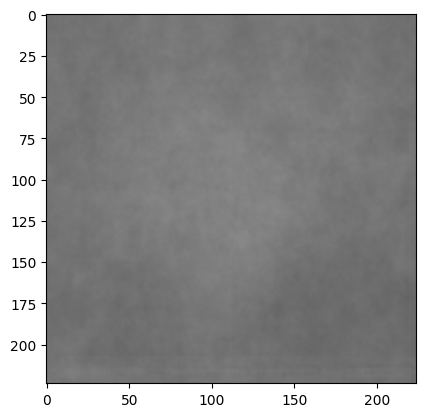

In [41]:
img = Image.fromarray(mean_img)
plt.imshow(img)

In [42]:
pca = PCA()
train_pca = pca.fit_transform(train)
print(pca.explained_variance_ratio_.shape)
np.cov(train_pca)

(240,)


array([[252.29897   ,  25.06329392,   6.60836985, ...,  17.41524353,
          3.88684305,  -9.83591432],
       [ 25.06329392, 192.12235341,  48.26310603, ...,  -9.48705161,
         24.84315839,   7.43937295],
       [  6.60836985,  48.26310603, 261.82185521, ..., -71.15349362,
         47.26593296,  73.00520839],
       ...,
       [ 17.41524353,  -9.48705161, -71.15349362, ..., 169.73777117,
        -35.37862762, -62.96394916],
       [  3.88684305,  24.84315839,  47.26593296, ..., -35.37862762,
        148.05190458,  38.56298557],
       [ -9.83591432,   7.43937295,  73.00520839, ..., -62.96394916,
         38.56298557, 175.12561972]])

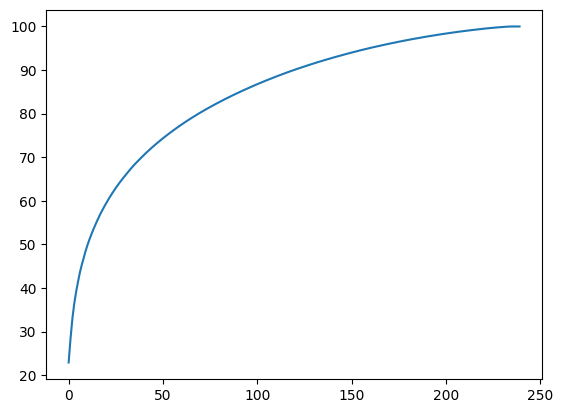

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))

In [44]:
# są posortowane po explained value od największych zgodnie z https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
for (idx, eigenvector) in enumerate(pca.components_):
  print(pca.explained_variance_ratio_[idx], eigenvector)

0.22902193991378111 [0.00403654 0.00458035 0.0047121  ... 0.00366979 0.00382681 0.00370559]
0.05491205141842463 [-0.00369952 -0.00471693 -0.0046805  ... -0.00065285 -0.00100807
 -0.0006093 ]
0.04638336379163811 [-0.00354356 -0.0026662  -0.00242392 ... -0.00745834 -0.00738509
 -0.00790211]
0.03479766181786598 [ 0.00758072  0.00732889  0.00703879 ... -0.00163259 -0.00174994
 -0.00168367]
0.02686280038745804 [ 1.41119353e-05 -2.32677247e-03 -2.72601565e-03 ...  8.96106593e-03
  8.97068172e-03  9.36480105e-03]
0.02289736868348018 [-0.00065443 -0.00047911 -0.00084861 ...  0.000529    0.00023076
  0.00013556]
0.021438840757196737 [0.00279247 0.00195514 0.00217886 ... 0.00665774 0.00634511 0.00656912]
0.017330634021037728 [0.00519325 0.00626155 0.00620048 ... 0.00355441 0.00344355 0.00282918]
0.016055104814266224 [ 0.00101846  0.00162721  0.00152675 ... -0.00370808 -0.00400357
 -0.00394313]
0.015117101291527938 [-0.00016962  0.00101279  0.00152183 ...  0.00263138  0.0029911
  0.00366649]
0.01

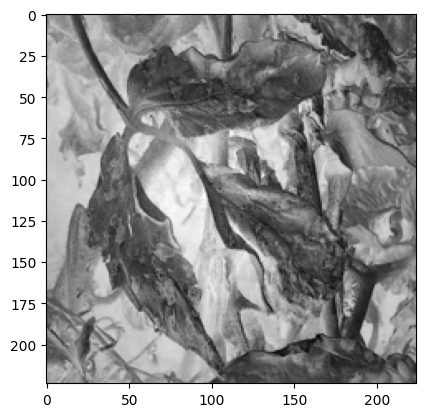

In [45]:
train_pca_recovered = pca.inverse_transform(train_pca)
im_rec = train_pca_recovered[0].reshape(224, 224)
plt.imshow(im_rec, cmap='gray_r')


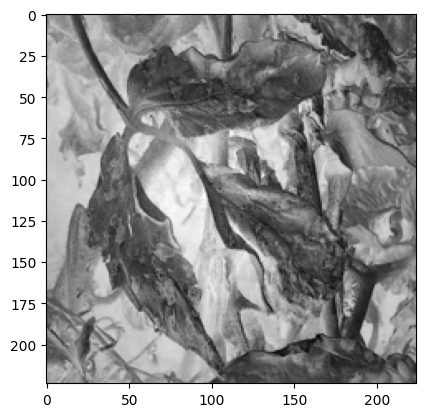

In [46]:
im = train[0].reshape(224, 224)
plt.imshow(im, cmap='gray_r')

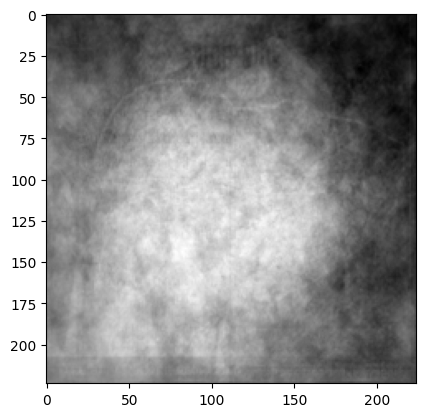

In [47]:
pca3 = PCA(n_components=3)
train_pca3 = pca3.fit_transform(train)
train_pca3_recovered = pca3.inverse_transform(train_pca3)
im_rec3 = train_pca3_recovered[0].reshape(224, 224)
plt.imshow(im_rec3, cmap='gray_r')

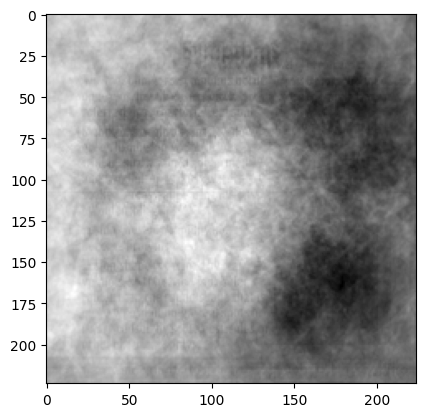

In [48]:
pca9 = PCA(n_components=9)
train_pca9 = pca9.fit_transform(train)
train_pca9_recovered = pca9.inverse_transform(train_pca9)
im_rec9 = train_pca9_recovered[0].reshape(224, 224)
plt.imshow(im_rec9, cmap='gray_r')

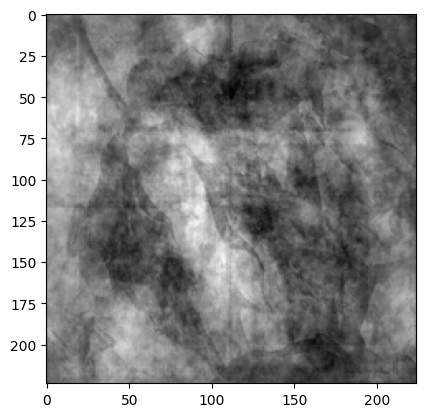

In [49]:
pca27 = PCA(n_components=27)
train_pca27 = pca27.fit_transform(train)
train_pca27_recovered = pca27.inverse_transform(train_pca27)
im_rec27 = train_pca27_recovered[0].reshape(224, 224)
plt.imshow(im_rec27, cmap='gray_r')